### Setup required:

First go in to `ChemicalTangents/pkg` and run `python setup.py build_ext --inplace`

In [1]:
# standard library
from os import path
import sys
_path = path.abspath('../pkg/')
if _path not in sys.path:
    sys.path.append(_path)

# Third-party
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Custom
import gala.coordinates as gc
import gala.dynamics as gd
import gala.integrate as gi
import gala.potential as gp
from gala.units import UnitSystem

from chemtrails.potential import Sech2Potential

In [2]:
usys = UnitSystem(u.pc, u.Myr, u.Msun, u.radian)

In [3]:
pot = Sech2Potential(rho0=4. * u.Msun/u.pc**3, 
                     z0=100. * u.pc, 
                     units=usys)

In [4]:
pot

<Sech2Potential: rho0=4.00, z0=100.00 (pc,Myr,solMass,rad)>

In [5]:
np.sqrt(pot.energy(150.*u.pc)).to(u.km/u.s)

<Quantity [ 47.25841675] km / s>

### Compute a single orbit:

In [6]:
w0 = gd.PhaseSpacePosition(pos=[50.]*u.pc,
                           vel=[0.]*u.km/u.s)

In [7]:
orbit = pot.integrate_orbit(w0, dt=0.5*u.Myr, n_steps=1000)

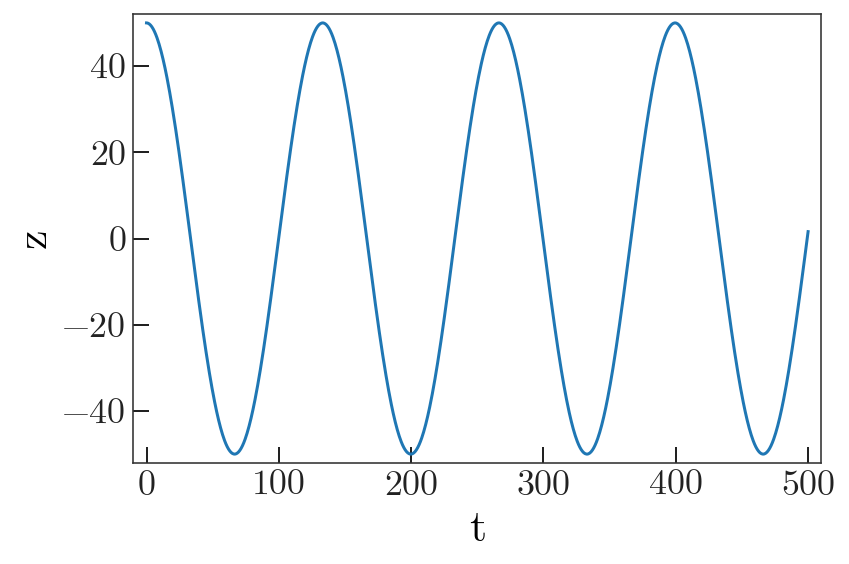

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
_ = orbit.plot(labels=['t', 'z'], axes=[ax])

### Compute many orbits simultaneously:

In [9]:
n_orbits = 1024

In [10]:
z0s = np.random.normal(0, 5., size=n_orbits).reshape(1, n_orbits) * u.pc
lnv0s = np.random.normal(np.log(10), 1., size=n_orbits).reshape(1, n_orbits)
v0s = np.random.choice([-1, 1], size=n_orbits) * np.exp(lnv0s) * u.km/u.s

In [11]:
w0s = gd.PhaseSpacePosition(pos=z0s, vel=v0s)

In [12]:
%time orbits = pot.integrate_orbit(w0s, dt=0.5*u.Myr, n_steps=1000)

CPU times: user 75.9 ms, sys: 28.7 ms, total: 105 ms
Wall time: 114 ms


Plot 16 orbits:

(-1000, 1000)

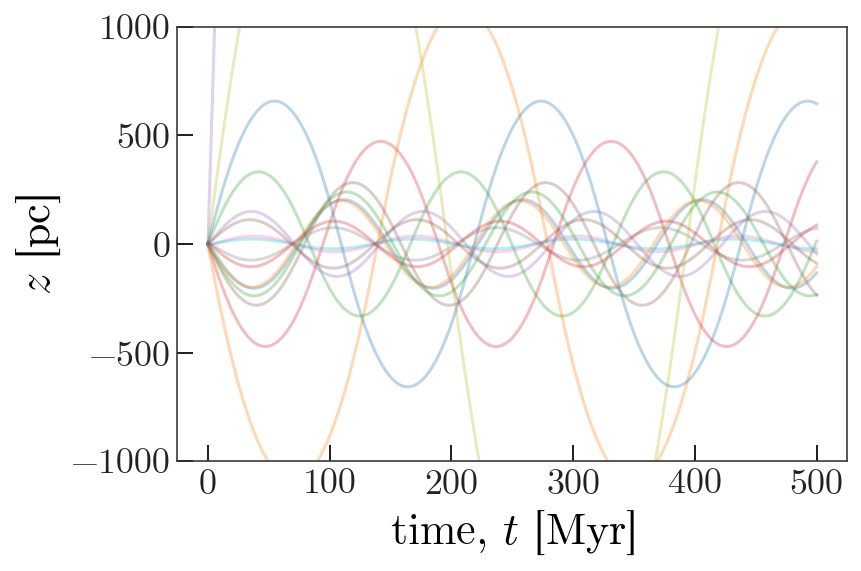

In [14]:
for i in range(16):
    plt.plot(orbits.t, 
             orbits[:, i].pos.x1, marker='', 
             alpha=0.3)
    
plt.xlabel('time, $t$ [{0:latex_inline}]'.format(orbits.t.unit))
plt.ylabel('$z$ [{0:latex_inline}]'.format(orbits[:, i].pos.x1.unit))
plt.ylim(-1000, 1000)